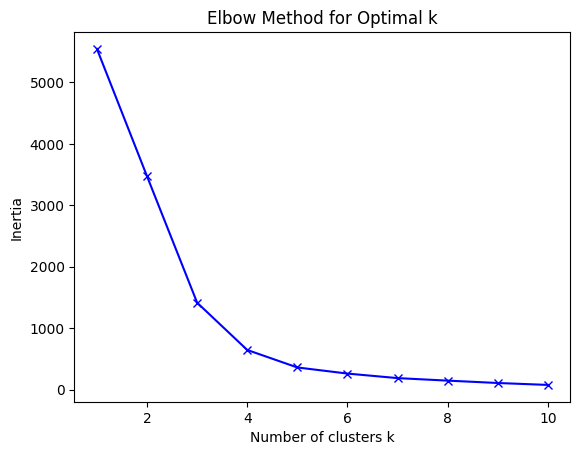

         total_inflow  total_outflow  transaction_count  loan_count  \
cluster                                                               
0        8.030476e+02            0.0           0.087537    0.087537   
1        1.850936e+06            0.0         131.333333  131.333333   
2        0.000000e+00            0.0           0.000000    0.000000   
3        3.768504e+05            0.0          27.666667   27.666667   

         avg_loan_amount  total_loan_amount  order_count  total_order_amount  \
cluster                                                                        
0             622.913947       4.019359e+03     1.851632        7.046626e+03   
1          177500.000000       2.077975e+07   131.333333        6.144559e+05   
2               0.000000       0.000000e+00  5231.000000        1.643550e+07   
3          163070.400000       2.843741e+06    27.666667        1.200872e+05   

         card_count  
cluster              
0               1.0  
1               1.0  
2   

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Load the fixed CSV
df = pd.read_csv("E:/Academics/Projects/Sql/Capstone Project/customer_features.csv")

# 2. Select numeric columns for clustering
numeric_cols = [
    'total_inflow', 'total_outflow', 'transaction_count',
    'loan_count', 'avg_loan_amount', 'total_loan_amount',
    'order_count', 'total_order_amount', 'card_count'
]
X = df[numeric_cols]

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Determine optimal k using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 5. Fit KMeans with chosen k (example: k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 6. Save the clustered data
df.to_csv("E:/Academics/Projects/Sql/Capstone Project/customer_clusters.csv", index=False)

# 7. Optional: see cluster summary
print(df.groupby('cluster')[numeric_cols].mean())


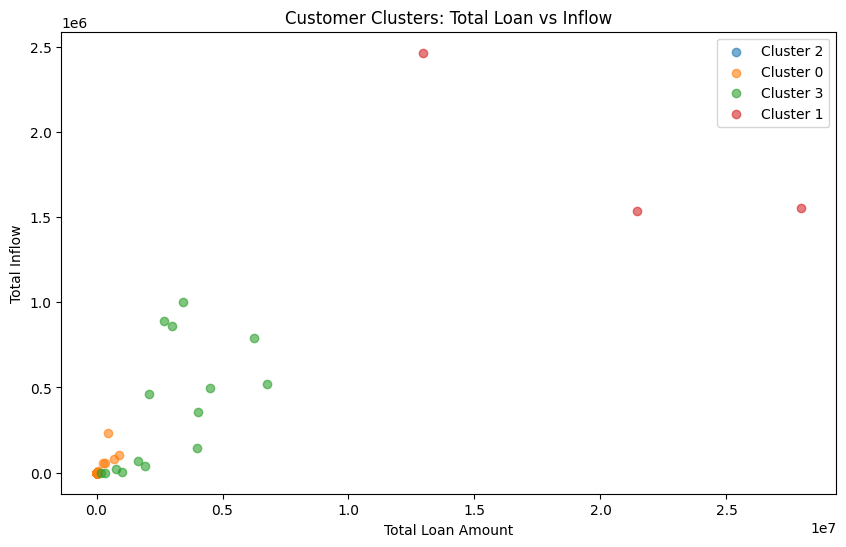

In [2]:
import matplotlib.pyplot as plt

# Scatter plot by cluster
plt.figure(figsize=(10,6))
for cluster in df['cluster'].unique():
    subset = df[df['cluster'] == cluster]
    plt.scatter(
        subset['total_loan_amount'], 
        subset['total_inflow'], 
        label=f'Cluster {cluster}', 
        alpha=0.6
    )

plt.xlabel('Total Loan Amount')
plt.ylabel('Total Inflow')
plt.title('Customer Clusters: Total Loan vs Inflow')
plt.legend()
plt.show()
